In [1]:
!nvidia-smi

Mon May 20 13:26:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.08             Driver Version: 535.161.08   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       On  | 00000000:00:1E.0 Off |                    0 |
| N/A   25C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/ec2-user/SageMaker


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (16 CPUs, 62.0 GB RAM, 87.2/135.0 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
import boto3
import os
import io
from zipfile import ZipFile
from sagemaker import get_execution_role

role = get_execution_role()
bucket='x-beagle'
data_key = 'custom-dataset.zip'
data_location = 's3://{}/{}'.format(bucket, data_key)

s3 = boto3.client('s3')

# S3에서 ZIP 파일 다운로드
zip_obj = s3.get_object(Bucket=bucket, Key=data_key)
zip_body = io.BytesIO(zip_obj['Body'].read())

# 압축 해제
with ZipFile(zip_body, 'r') as zip_file:
    zip_file.extractall('./data')

# 압축 해제된 데이터 디렉토리 경로
data_dir = './data'

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [6]:
%%writefile dataset.yaml
train: /home/ec2-user/SageMaker/data/train/
val: /home/ec2-user/SageMaker/data/val/
test: /home/ec2-user/SageMaker/data/test/
nc: 42
names: ['Hammer','SSD','Alcohol','Spanner','Axe','Awl','Throwing Knife','Firecracker','Thinner','Plier','Match',
        'Smart Phone','Scissors','Tablet PC','Solid Fuel','Bat','Portable Gas','Nail Clippers','Knife','Metal Pipe',
        'Electronic Cigarettes(Liquid)','Supplymentary Battery','Bullet','Gun Parts','USB','Liquid','Aerosol','Screwdriver',
        'Chisel','Handcuffs','Lighter','HDD','Electronic Cigarettes','Battery','Gun','Laptop','Saw','Zippo Oil','Stun Gun',
        'Camera','Camcorder','SD Card']

Overwriting dataset.yaml


In [ ]:
# 데이터셋 설정 파일 경로
dataset_yaml = '/home/ec2-user/SageMaker/dataset.yaml'

# YOLOv8 모델 학습
model = YOLO('yolov8n.pt')
results = model.train(data=dataset_yaml, epochs=100, imgsz=640, batch=8)

New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/ec2-user/SageMaker/dataset.yaml, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/100      1.27G     0.6055     0.3681     0.9144         28        640: 100%|██████████| 3284/3284 [04:18<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 205/205 [00:18<00:00, 11.33it/s]
                   all       3276      16695      0.868      0.854      0.887      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/100      1.26G     0.5998      0.366     0.9136         44        640: 100%|██████████| 3284/3284 [04:18<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 205/205 [00:17<00:00, 11.48it/s]
                   all       3276      16695      0.869      0.853      0.886      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     38/100      1.25G      0.595     0.361

     73/100      1.27G     0.4881     0.3019      0.877         74        640: 100%|██████████| 3284/3284 [04:19<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 205/205 [00:18<00:00, 11.16it/s]
                   all       3276      16695      0.871       0.85      0.884      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     74/100      1.25G     0.4848     0.3008     0.8759         58        640: 100%|██████████| 3284/3284 [04:19<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 205/205 [00:18<00:00, 11.38it/s]
                   all       3276      16695      0.872      0.848      0.883      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     75/100      1.27G       0.48     0.2977     0.8744         52        640: 100%|██████████| 3284/3284 [04:20<00:00, 12

In [8]:
!ls {HOME}/runs/detect/train4/

args.yaml			 PR_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png  R_curve.png	   val_batch0_pred.jpg
confusion_matrix.png		 results.csv	   val_batch1_labels.jpg
F1_curve.png			 results.png	   val_batch1_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  val_batch2_labels.jpg
labels.jpg			 train_batch1.jpg  val_batch2_pred.jpg
P_curve.png			 train_batch2.jpg  weights


/home/ec2-user/SageMaker


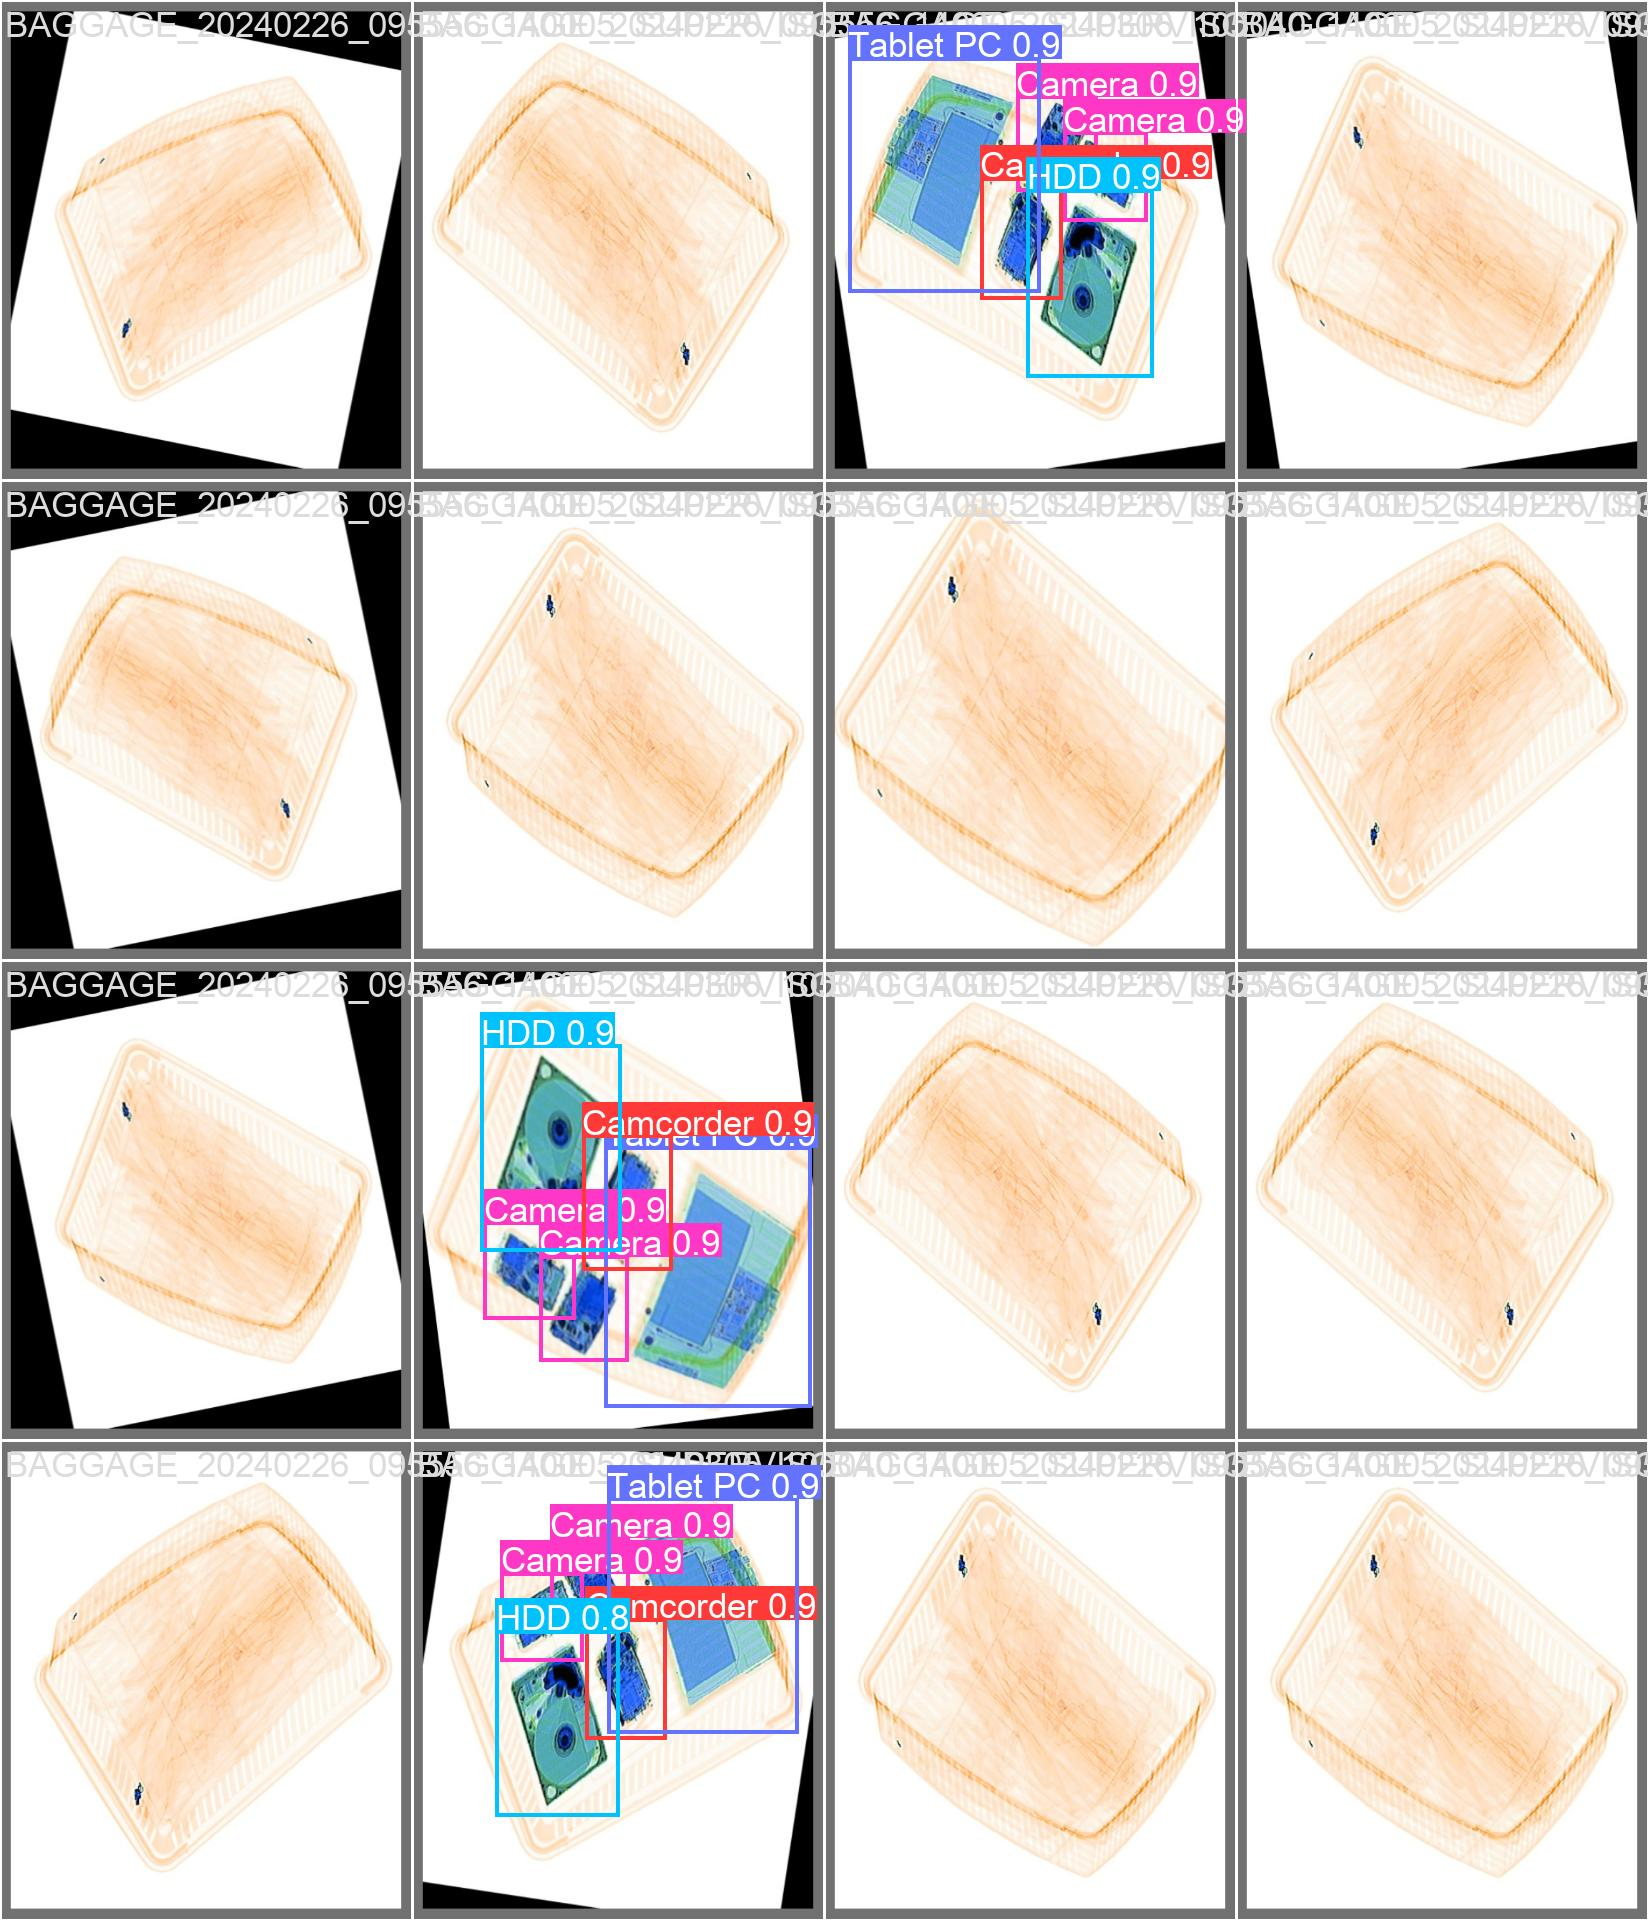

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data=./dataset.yaml

/home/ec2-user/SageMaker
Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3013838 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/ec2-user/SageMaker/data/val.cache... 3276 images, 0 backgrou
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       3276      16695      0.879      0.845      0.888      0.689
                   SSD       3276       2520      0.868      0.738      0.802      0.662
               Spanner       3276        189          1      0.877      0.994      0.904
                 Plier       3276        189      0.893          1      0.995      0.883
           Smart Phone       3276        441      0.855      0.687      0.798      0.486
             Tablet PC       3276       1008      0.935      0.938      0.955      0.832
                 Knife       3276        693      0.915      0.895      0.968      0.669
                   USB       

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/home/ec2-user/SageMaker/data/test save=True save_txt=True

/home/ec2-user/SageMaker
Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.1.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3013838 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/3339 /home/ec2-user/SageMaker/data/test/2024032609122018.png: 384x640 7 SSDs, 6 USBs, 7 Cameras, 2 Camcorders, 294.9ms
image 2/3339 /home/ec2-user/SageMaker/data/test/2024032609122018_aug0.png: 384x640 7 SSDs, 6 USBs, 7 Cameras, 2 Camcorders, 6.3ms
image 3/3339 /home/ec2-user/SageMaker/data/test/2024032609122018_aug0_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 3 Camcorders, 6.0ms
image 4/3339 /home/ec2-user/SageMaker/data/test/2024032609122018_aug0_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 6.0ms
image 5/3339 /home/ec2-user/SageMaker/data/test/2024032609122018_aug1.png: 384x640 6 SSDs, 6 USBs, 8 Cameras, 1 Camcorder, 1 SD Card, 6.0ms
image 6/3339 /home/ec2-user/SageMaker/data/test/2024032609122018_aug10.png: 384x640 4 SSDs, 7 USBs, 7 Camera

image 60/3339 /home/ec2-user/SageMaker/data/test/2024032609122018_aug9_lr.png: 384x640 4 SSDs, 7 USBs, 4 Cameras, 2 Camcorders, 1 SD Card, 6.0ms
image 61/3339 /home/ec2-user/SageMaker/data/test/2024032609122018_aug9_ud.png: 384x640 4 SSDs, 5 USBs, 5 Cameras, 2 Camcorders, 6.1ms
image 62/3339 /home/ec2-user/SageMaker/data/test/2024032609122018_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 3 Camcorders, 6.1ms
image 63/3339 /home/ec2-user/SageMaker/data/test/2024032609122018_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 6.0ms
image 64/3339 /home/ec2-user/SageMaker/data/test/2024032609161044.png: 384x640 7 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 6.0ms
image 65/3339 /home/ec2-user/SageMaker/data/test/2024032609161044_aug0.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 6.1ms
image 66/3339 /home/ec2-user/SageMaker/data/test/2024032609161044_aug0_lr.png: 384x640 7 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 6.0ms
image 67/3339 /home/ec2-user/SageMaker

image 118/3339 /home/ec2-user/SageMaker/data/test/2024032609161044_aug7_ud.png: 384x640 7 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 6.0ms
image 119/3339 /home/ec2-user/SageMaker/data/test/2024032609161044_aug8.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 6.0ms
image 120/3339 /home/ec2-user/SageMaker/data/test/2024032609161044_aug8_lr.png: 384x640 6 SSDs, 9 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 6.1ms
image 121/3339 /home/ec2-user/SageMaker/data/test/2024032609161044_aug8_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 6.0ms
image 122/3339 /home/ec2-user/SageMaker/data/test/2024032609161044_aug9.png: 384x640 7 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 6.0ms
image 123/3339 /home/ec2-user/SageMaker/data/test/2024032609161044_aug9_lr.png: 384x640 6 SSDs, 10 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 6.0ms
image 124/3339 /home/ec2-user/SageMaker/data/test/2024032609161044_aug9_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Car

image 182/3339 /home/ec2-user/SageMaker/data/test/2024032609163462_aug8.png: 384x640 3 SSDs, 6 USBs, 4 Cameras, 1 SD Card, 6.0ms
image 183/3339 /home/ec2-user/SageMaker/data/test/2024032609163462_aug8_lr.png: 384x640 4 SSDs, 5 USBs, 4 Cameras, 2 SD Cards, 6.0ms
image 184/3339 /home/ec2-user/SageMaker/data/test/2024032609163462_aug8_ud.png: 384x640 5 SSDs, 4 USBs, 5 Cameras, 6.0ms
image 185/3339 /home/ec2-user/SageMaker/data/test/2024032609163462_aug9.png: 384x640 7 SSDs, 5 USBs, 4 Cameras, 6.0ms
image 186/3339 /home/ec2-user/SageMaker/data/test/2024032609163462_aug9_lr.png: 384x640 6 SSDs, 3 USBs, 4 Cameras, 1 SD Card, 6.0ms
image 187/3339 /home/ec2-user/SageMaker/data/test/2024032609163462_aug9_ud.png: 384x640 4 SSDs, 3 USBs, 4 Cameras, 6.0ms
image 188/3339 /home/ec2-user/SageMaker/data/test/2024032609163462_lr.png: 384x640 3 SSDs, 3 USBs, 4 Cameras, 1 SD Card, 6.1ms
image 189/3339 /home/ec2-user/SageMaker/data/test/2024032609163462_ud.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 6.0ms
ima

image 246/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_082339_140005_SUPERVISOR_A_aug8_lr.jpg: 640x544 1 Laptop, 5.2ms
image 247/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_082339_140005_SUPERVISOR_A_aug8_ud.jpg: 640x544 1 Laptop, 5.2ms
image 248/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_082339_140005_SUPERVISOR_A_aug9.jpg: 640x544 1 Laptop, 5.2ms
image 249/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_082339_140005_SUPERVISOR_A_aug9_lr.jpg: 640x544 1 Laptop, 5.3ms
image 250/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_082339_140005_SUPERVISOR_A_aug9_ud.jpg: 640x544 1 Laptop, 5.2ms
image 251/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_082339_140005_SUPERVISOR_A_lr.jpg: 640x544 1 Laptop, 5.3ms
image 252/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_082339_140005_SUPERVISOR_A_ud.jpg: 640x544 1 Laptop, 5.2ms
image 253/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_084535_140005_SUPERVISOR_A.jp

image 309/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_084535_140005_SUPERVISOR_A_aug8_lr.jpg: 640x384 1 Camera, 5.3ms
image 310/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_084535_140005_SUPERVISOR_A_aug8_ud.jpg: 640x384 1 Camera, 1 Camcorder, 5.3ms
image 311/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_084535_140005_SUPERVISOR_A_aug9.jpg: 640x384 1 Camera, 5.3ms
image 312/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_084535_140005_SUPERVISOR_A_aug9_lr.jpg: 640x384 1 Camera, 5.2ms
image 313/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_084535_140005_SUPERVISOR_A_aug9_ud.jpg: 640x384 1 Camera, 5.3ms
image 314/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_084535_140005_SUPERVISOR_A_lr.jpg: 640x384 1 Camera, 5.3ms
image 315/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_084535_140005_SUPERVISOR_A_ud.jpg: 640x384 1 Camera, 5.3ms
image 316/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085702_140005_0_

image 373/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085702_140005_0_A_aug8_ud.jpg: 640x448 4 USBs, 1 Laptop, 5.3ms
image 374/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085702_140005_0_A_aug9.jpg: 640x448 4 USBs, 1 Laptop, 5.3ms
image 375/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085702_140005_0_A_aug9_lr.jpg: 640x448 4 USBs, 1 Laptop, 5.3ms
image 376/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085702_140005_0_A_aug9_ud.jpg: 640x448 4 USBs, 1 Laptop, 5.3ms
image 377/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085702_140005_0_A_lr.jpg: 640x448 4 USBs, 1 Laptop, 5.4ms
image 378/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085702_140005_0_A_ud.jpg: 640x448 4 USBs, 1 Laptop, 5.3ms
image 379/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085734_140005_0_A.jpg: 640x448 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 5.4ms
image 380/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085734_140005_0_A_aug0.jpg: 64

image 431/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085734_140005_0_A_aug7.jpg: 640x448 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 5.2ms
image 432/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085734_140005_0_A_aug7_lr.jpg: 640x448 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 5.3ms
image 433/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085734_140005_0_A_aug7_ud.jpg: 640x448 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 5.3ms
image 434/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085734_140005_0_A_aug8.jpg: 640x448 1 SSD, 5 USBs, 1 HDD, 1 Laptop, 5.3ms
image 435/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085734_140005_0_A_aug8_lr.jpg: 640x448 1 SSD, 5 USBs, 1 HDD, 1 Laptop, 5.3ms
image 436/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085734_140005_0_A_aug8_ud.jpg: 640x448 1 SSD, 4 USBs, 1 HDD, 1 Laptop, 5.8ms
image 437/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085734_140005_0_A_aug9.jpg: 640x448 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 5.3ms
i

image 490/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085821_140005_0_A_aug5_ud.jpg: 640x480 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 5.5ms
image 491/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085821_140005_0_A_aug6.jpg: 640x480 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 5.6ms
image 492/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085821_140005_0_A_aug6_lr.jpg: 640x480 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 6.0ms
image 493/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085821_140005_0_A_aug6_ud.jpg: 640x480 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 6.1ms
image 494/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085821_140005_0_A_aug7.jpg: 640x480 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 6.1ms
image 495/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085821_140005_0_A_aug7_lr.jpg: 640x480 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 5.9ms
image 496/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_085821_140005_0_A_aug7_ud.jpg: 640x480 1 SSD, 3 USBs, 1 HDD, 1 Laptop, 5.5m

image 550/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090424_140005_0_A_aug4_ud.jpg: 640x512 1 SSD, 1 USB, 1 HDD, 1 Laptop, 5.5ms
image 551/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090424_140005_0_A_aug5.jpg: 640x512 1 SSD, 2 USBs, 1 HDD, 1 Laptop, 5.5ms
image 552/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090424_140005_0_A_aug5_lr.jpg: 640x512 1 SSD, 2 USBs, 1 HDD, 1 Laptop, 5.4ms
image 553/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090424_140005_0_A_aug5_ud.jpg: 640x512 1 SSD, 2 USBs, 1 HDD, 1 Laptop, 5.4ms
image 554/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090424_140005_0_A_aug6.jpg: 640x512 1 SSD, 2 USBs, 1 HDD, 1 Laptop, 5.4ms
image 555/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090424_140005_0_A_aug6_lr.jpg: 640x512 1 SSD, 2 USBs, 1 HDD, 1 Laptop, 5.4ms
image 556/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090424_140005_0_A_aug6_ud.jpg: 640x512 1 SSD, 2 USBs, 1 HDD, 1 Laptop, 5.4ms

image 608/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090455_140005_0_A_aug3.jpg: 640x544 1 SSD, 1 USB, 1 HDD, 1 Laptop, 5.5ms
image 609/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090455_140005_0_A_aug3_lr.jpg: 640x544 1 SSD, 1 USB, 1 HDD, 1 Laptop, 5.5ms
image 610/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090455_140005_0_A_aug3_ud.jpg: 640x544 1 SSD, 1 USB, 1 HDD, 1 Laptop, 5.5ms
image 611/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090455_140005_0_A_aug4.jpg: 640x544 1 SSD, 1 USB, 1 HDD, 1 Laptop, 5.5ms
image 612/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090455_140005_0_A_aug4_lr.jpg: 640x544 1 SSD, 1 USB, 1 HDD, 1 Laptop, 5.8ms
image 613/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090455_140005_0_A_aug4_ud.jpg: 640x544 1 SSD, 1 USB, 1 HDD, 1 Laptop, 5.7ms
image 614/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090455_140005_0_A_aug5.jpg: 640x544 1 SSD, 1 USB, 1 HDD, 1 Laptop, 5.7ms
image 61

image 668/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090710_140005_0_A_aug2.jpg: 640x480 1 SSD, 5 USBs, 2 HDDs, 5.3ms
image 669/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090710_140005_0_A_aug2_lr.jpg: 640x480 1 SSD, 4 USBs, 2 HDDs, 5.3ms
image 670/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090710_140005_0_A_aug2_ud.jpg: 640x480 1 SSD, 4 USBs, 2 HDDs, 5.4ms
image 671/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090710_140005_0_A_aug3.jpg: 640x480 1 SSD, 4 USBs, 2 HDDs, 5.4ms
image 672/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090710_140005_0_A_aug3_lr.jpg: 640x480 1 SSD, 4 USBs, 2 HDDs, 5.3ms
image 673/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090710_140005_0_A_aug3_ud.jpg: 640x480 1 SSD, 4 USBs, 2 HDDs, 5.3ms
image 674/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_090710_140005_0_A_aug4.jpg: 640x480 1 SSD, 4 USBs, 2 HDDs, 5.3ms
image 675/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_202402

image 731/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091205_140005_0_A_aug2.jpg: 640x480 1 USB, 1 HDD, 1 Laptop, 5.4ms
image 732/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091205_140005_0_A_aug2_lr.jpg: 640x480 1 USB, 1 HDD, 1 Laptop, 5.3ms
image 733/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091205_140005_0_A_aug2_ud.jpg: 640x480 1 USB, 1 HDD, 1 Laptop, 5.3ms
image 734/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091205_140005_0_A_aug3.jpg: 640x480 1 HDD, 1 Laptop, 5.3ms
image 735/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091205_140005_0_A_aug3_lr.jpg: 640x480 1 HDD, 1 Laptop, 5.3ms
image 736/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091205_140005_0_A_aug3_ud.jpg: 640x480 2 USBs, 1 HDD, 1 Laptop, 5.3ms
image 737/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091205_140005_0_A_aug4.jpg: 640x480 1 HDD, 1 Laptop, 5.3ms
image 738/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091205_140

image 794/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091457_140005_0_A_aug2.jpg: 640x544 1 HDD, 1 Laptop, 1 Camera, 5.4ms
image 795/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091457_140005_0_A_aug2_lr.jpg: 640x544 1 HDD, 1 Laptop, 1 Camera, 5.3ms
image 796/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091457_140005_0_A_aug2_ud.jpg: 640x544 1 HDD, 1 Laptop, 1 Camera, 5.4ms
image 797/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091457_140005_0_A_aug3.jpg: 640x544 1 HDD, 1 Laptop, 1 Camera, 5.4ms
image 798/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091457_140005_0_A_aug3_lr.jpg: 640x544 1 HDD, 2 Laptops, 1 Camera, 5.4ms
image 799/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091457_140005_0_A_aug3_ud.jpg: 640x544 1 HDD, 1 Laptop, 1 Camera, 5.3ms
image 800/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_091457_140005_0_A_aug4.jpg: 640x544 1 HDD, 2 Laptops, 1 Camera, 5.4ms
image 801/3339 /home/ec2-user/Sage

image 856/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_094957_140005_0_A_aug1_ud.jpg: 640x384 1 Camera, 1 SD Card, 5.4ms
image 857/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_094957_140005_0_A_aug2.jpg: 640x384 1 Camera, 1 SD Card, 5.4ms
image 858/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_094957_140005_0_A_aug2_lr.jpg: 640x384 1 Camera, 1 SD Card, 5.4ms
image 859/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_094957_140005_0_A_aug2_ud.jpg: 640x384 1 Camera, 1 SD Card, 5.4ms
image 860/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_094957_140005_0_A_aug3.jpg: 640x384 1 Camera, 1 SD Card, 5.4ms
image 861/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_094957_140005_0_A_aug3_lr.jpg: 640x384 1 Camera, 1 SD Card, 5.5ms
image 862/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_094957_140005_0_A_aug3_ud.jpg: 640x384 1 Camera, 1 SD Card, 5.4ms
image 863/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_094957_1

image 916/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104733_140005_SUPERVISOR_A_aug19_lr.jpg: 640x512 1 Smart Phone, 1 Tablet PC, 5.3ms
image 917/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104733_140005_SUPERVISOR_A_aug19_ud.jpg: 640x512 1 Smart Phone, 1 Tablet PC, 5.3ms
image 918/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104733_140005_SUPERVISOR_A_aug1_lr.jpg: 640x512 1 Smart Phone, 1 Tablet PC, 5.4ms
image 919/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104733_140005_SUPERVISOR_A_aug1_ud.jpg: 640x512 1 Smart Phone, 1 Tablet PC, 5.3ms
image 920/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104733_140005_SUPERVISOR_A_aug2.jpg: 640x512 1 Smart Phone, 1 Tablet PC, 5.4ms
image 921/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104733_140005_SUPERVISOR_A_aug2_lr.jpg: 640x512 1 Smart Phone, 1 Tablet PC, 5.3ms
image 922/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104733_140005_SUPERVISOR_A_aug2_ud.jpg: 

image 971/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104831_140005_SUPERVISOR_A_aug16_ud.jpg: 640x480 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.3ms
image 972/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104831_140005_SUPERVISOR_A_aug17.jpg: 640x480 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.3ms
image 973/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104831_140005_SUPERVISOR_A_aug17_lr.jpg: 640x480 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.3ms
image 974/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104831_140005_SUPERVISOR_A_aug17_ud.jpg: 640x480 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.3ms
image 975/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104831_140005_SUPERVISOR_A_aug18.jpg: 640x480 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.3ms
image 976/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104831_140005_SUPERVISOR_A_aug18_lr.jpg: 640x480 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.3ms
image 977/3339 /home/ec2-user/Sage

image 1025/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104850_140005_SUPERVISOR_A_aug13_ud.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.4ms
image 1026/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104850_140005_SUPERVISOR_A_aug14.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.4ms
image 1027/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104850_140005_SUPERVISOR_A_aug14_lr.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.4ms
image 1028/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104850_140005_SUPERVISOR_A_aug14_ud.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.3ms
image 1029/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104850_140005_SUPERVISOR_A_aug15.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.4ms
image 1030/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_104850_140005_SUPERVISOR_A_aug15_lr.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 2 SD Cards, 5.7ms
image 1031/3339 /home/ec2-us

image 1077/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug10.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.4ms
image 1078/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug10_lr.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.4ms
image 1079/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug10_ud.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 Camera, 1 SD Card, 5.4ms
image 1080/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug11.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 Camera, 1 SD Card, 5.5ms
image 1081/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug11_lr.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.5ms
image 1082/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug11_ud.jpg: 640x384 1 Smart Phone, 1 Tablet PC

image 1125/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug7_lr.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.4ms
image 1126/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug7_ud.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 Camera, 3 SD Cards, 5.4ms
image 1127/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug8.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.4ms
image 1128/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug8_lr.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.5ms
image 1129/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug8_ud.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 Camera, 1 SD Card, 5.4ms
image 1130/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105117_140005_SUPERVISOR_A_aug9.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 1 C

image 1173/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105127_140005_SUPERVISOR_A_aug2_lr.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.4ms
image 1174/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105127_140005_SUPERVISOR_A_aug2_ud.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.4ms
image 1175/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105127_140005_SUPERVISOR_A_aug3.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.4ms
image 1176/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105127_140005_SUPERVISOR_A_aug3_lr.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.4ms
image 1177/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105127_140005_SUPERVISOR_A_aug3_ud.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.5ms
image 1178/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105127_140005_SUPERVISOR_A_aug4.jpg: 640x544 1 Smart Phone, 1 Tablet PC, 1 

image 1223/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105249_140005_SUPERVISOR_A_aug16_ud.jpg: 640x512 1 Smart Phone, 1 Laptop, 1 Camera, 2 SD Cards, 5.4ms
image 1224/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105249_140005_SUPERVISOR_A_aug17.jpg: 640x512 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.3ms
image 1225/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105249_140005_SUPERVISOR_A_aug17_lr.jpg: 640x512 1 Smart Phone, 1 Tablet PC, 1 Camera, 3 SD Cards, 5.4ms
image 1226/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105249_140005_SUPERVISOR_A_aug17_ud.jpg: 640x512 1 Smart Phone, 1 Tablet PC, 1 Camera, 2 SD Cards, 5.3ms
image 1227/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105249_140005_SUPERVISOR_A_aug18.jpg: 640x512 1 Smart Phone, 1 HDD, 1 Laptop, 1 Camera, 2 SD Cards, 5.4ms
image 1228/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_105249_140005_SUPERVISOR_A_aug18_lr.jpg: 640x512 1 Smart Phone, 1 Laptop

image 1276/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_135111_140005_SUPERVISOR_A_aug13_lr.jpg: 640x544 1 Camcorder, 5.5ms
image 1277/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_135111_140005_SUPERVISOR_A_aug13_ud.jpg: 640x544 1 SSD, 1 Camcorder, 5.5ms
image 1278/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_135111_140005_SUPERVISOR_A_aug14.jpg: 640x544 1 Camcorder, 5.5ms
image 1279/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_135111_140005_SUPERVISOR_A_aug14_lr.jpg: 640x544 1 Camcorder, 5.5ms
image 1280/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_135111_140005_SUPERVISOR_A_aug14_ud.jpg: 640x544 1 Camcorder, 5.4ms
image 1281/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_135111_140005_SUPERVISOR_A_aug15.jpg: 640x544 1 Camcorder, 5.4ms
image 1282/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240221_135111_140005_SUPERVISOR_A_aug15_lr.jpg: 640x544 1 Camcorder, 5.4ms
image 1283/3339 /home/ec2-user/SageMaker/data/t

image 1336/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100858_140005_SUPERVISOR_A_aug12_lr.jpg: 640x576 2 Cameras, 1 Camcorder, 5.6ms
image 1337/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100858_140005_SUPERVISOR_A_aug12_ud.jpg: 640x576 2 Cameras, 1 Camcorder, 5.6ms
image 1338/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100858_140005_SUPERVISOR_A_aug13.jpg: 640x576 2 Cameras, 1 Camcorder, 5.5ms
image 1339/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100858_140005_SUPERVISOR_A_aug13_lr.jpg: 640x576 2 Cameras, 1 Camcorder, 5.5ms
image 1340/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100858_140005_SUPERVISOR_A_aug13_ud.jpg: 640x576 2 Cameras, 1 Camcorder, 5.4ms
image 1341/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100858_140005_SUPERVISOR_A_aug14.jpg: 640x576 2 Cameras, 1 Camcorder, 5.5ms
image 1342/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100858_140005_SUPERVISOR_A_aug14_lr.jpg: 640x576 2 Camer

image 1393/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100908_140005_SUPERVISOR_A_aug10_lr.jpg: 640x544 2 Cameras, 1 Camcorder, 5.4ms
image 1394/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100908_140005_SUPERVISOR_A_aug10_ud.jpg: 640x544 2 Cameras, 1 Camcorder, 5.5ms
image 1395/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100908_140005_SUPERVISOR_A_aug11.jpg: 640x544 2 Cameras, 1 Camcorder, 5.5ms
image 1396/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100908_140005_SUPERVISOR_A_aug11_lr.jpg: 640x544 2 Cameras, 1 Camcorder, 5.4ms
image 1397/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100908_140005_SUPERVISOR_A_aug11_ud.jpg: 640x544 2 Cameras, 1 Camcorder, 5.4ms
image 1398/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100908_140005_SUPERVISOR_A_aug12.jpg: 640x544 2 Cameras, 1 Camcorder, 5.4ms
image 1399/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100908_140005_SUPERVISOR_A_aug12_lr.jpg: 640x544 2 Camer

image 1451/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_aug0.jpg: 640x544 3 Cameras, 2 Camcorders, 5.4ms
image 1452/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_aug0_lr.jpg: 640x544 3 Cameras, 2 Camcorders, 5.4ms
image 1453/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_aug0_ud.jpg: 640x544 3 Cameras, 2 Camcorders, 5.4ms
image 1454/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_aug1.jpg: 640x544 3 Cameras, 2 Camcorders, 5.4ms
image 1455/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_aug10.jpg: 640x544 3 Cameras, 2 Camcorders, 5.5ms
image 1456/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_aug10_lr.jpg: 640x544 3 Cameras, 2 Camcorders, 5.4ms
image 1457/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_aug10_ud.jpg: 640x544 3 Camera

image 1508/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_aug9.jpg: 640x544 3 Cameras, 2 Camcorders, 5.5ms
image 1509/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_aug9_lr.jpg: 640x544 3 Cameras, 2 Camcorders, 5.4ms
image 1510/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_aug9_ud.jpg: 640x544 3 Cameras, 2 Camcorders, 5.4ms
image 1511/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_lr.jpg: 640x544 3 Cameras, 2 Camcorders, 5.4ms
image 1512/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_100949_140005_SUPERVISOR_A_ud.jpg: 640x544 3 Cameras, 2 Camcorders, 5.4ms
image 1513/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_102349_140005_SUPERVISOR_A.jpg: 640x480 1 Tablet PC, 2 HDDs, 2 Cameras, 2 Camcorders, 5.8ms
image 1514/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_102349_140005_SUPERVISOR_A_aug0.jpg: 640x480 1 Tab

image 1559/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_102349_140005_SUPERVISOR_A_aug5.jpg: 640x480 1 Tablet PC, 2 HDDs, 2 Cameras, 2 Camcorders, 5.4ms
image 1560/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_102349_140005_SUPERVISOR_A_aug5_lr.jpg: 640x480 1 Tablet PC, 2 HDDs, 2 Cameras, 2 Camcorders, 5.3ms
image 1561/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_102349_140005_SUPERVISOR_A_aug5_ud.jpg: 640x480 1 Tablet PC, 2 HDDs, 2 Cameras, 2 Camcorders, 5.9ms
image 1562/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_102349_140005_SUPERVISOR_A_aug6.jpg: 640x480 1 Tablet PC, 2 HDDs, 2 Cameras, 2 Camcorders, 5.3ms
image 1563/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_102349_140005_SUPERVISOR_A_aug6_lr.jpg: 640x480 1 Tablet PC, 2 HDDs, 2 Cameras, 2 Camcorders, 5.3ms
image 1564/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240222_102349_140005_SUPERVISOR_A_aug6_ud.jpg: 640x480 1 Tablet PC, 2 HDDs, 2 Cameras, 2 Camcorders, 5.3m

image 1616/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_133757_140005_SUPERVISOR_A_aug3.jpg: 640x384 2 USBs, 1 Laptop, 5.6ms
image 1617/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_133757_140005_SUPERVISOR_A_aug3_lr.jpg: 640x384 1 SSD, 1 USB, 1 Laptop, 5.4ms
image 1618/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_133757_140005_SUPERVISOR_A_aug3_ud.jpg: 640x384 1 SSD, 1 USB, 1 Laptop, 5.5ms
image 1619/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_133757_140005_SUPERVISOR_A_aug4.jpg: 640x384 3 USBs, 1 Laptop, 5.5ms
image 1620/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_133757_140005_SUPERVISOR_A_aug4_lr.jpg: 640x384 1 USB, 1 Laptop, 5.5ms
image 1621/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_133757_140005_SUPERVISOR_A_aug4_ud.jpg: 640x384 2 USBs, 1 Laptop, 5.4ms
image 1622/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_133757_140005_SUPERVISOR_A_aug5.jpg: 640x384 2 USBs, 1 Laptop, 5.4ms
image 1623/3339 /h

image 1672/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134247_140005_SUPERVISOR_A_aug19_lr.jpg: 640x416 2 SSDs, 1 Laptop, 1 Camera, 5.5ms
image 1673/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134247_140005_SUPERVISOR_A_aug19_ud.jpg: 640x416 1 SSD, 3 USBs, 1 Laptop, 1 Camera, 5.5ms
image 1674/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134247_140005_SUPERVISOR_A_aug1_lr.jpg: 640x416 1 SSD, 1 USB, 1 Laptop, 1 Camera, 5.5ms
image 1675/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134247_140005_SUPERVISOR_A_aug1_ud.jpg: 640x416 1 SSD, 3 USBs, 1 Laptop, 1 Camera, 5.5ms
image 1676/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134247_140005_SUPERVISOR_A_aug2.jpg: 640x416 1 SSD, 3 USBs, 1 Laptop, 1 Camera, 5.5ms
image 1677/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134247_140005_SUPERVISOR_A_aug2_lr.jpg: 640x416 2 SSDs, 3 USBs, 1 Laptop, 1 Camera, 5.5ms
image 1678/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_2024022

image 1726/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134400_140005_SUPERVISOR_A_aug16_lr.jpg: 640x480 1 USB, 1 Laptop, 1 Camera, 5.4ms
image 1727/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134400_140005_SUPERVISOR_A_aug16_ud.jpg: 640x480 1 USB, 1 Laptop, 1 Camera, 5.4ms
image 1728/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134400_140005_SUPERVISOR_A_aug17.jpg: 640x480 1 USB, 1 Laptop, 1 Camera, 5.4ms
image 1729/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134400_140005_SUPERVISOR_A_aug17_lr.jpg: 640x480 1 USB, 1 Laptop, 1 Camera, 5.5ms
image 1730/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134400_140005_SUPERVISOR_A_aug17_ud.jpg: 640x480 1 USB, 1 Laptop, 1 Camera, 5.4ms
image 1731/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134400_140005_SUPERVISOR_A_aug18.jpg: 640x480 1 USB, 1 Laptop, 1 Camera, 5.4ms
image 1732/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240223_134400_140005_SUPERVISOR_A_aug18_lr.jp

image 1784/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095144_140005_SUPERVISOR_A_aug14_ud.jpg: 640x448 2 SSDs, 2 SD Cards, 5.4ms
image 1785/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095144_140005_SUPERVISOR_A_aug15.jpg: 640x448 2 SSDs, 2 SD Cards, 5.4ms
image 1786/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095144_140005_SUPERVISOR_A_aug15_lr.jpg: 640x448 2 SSDs, 2 SD Cards, 5.4ms
image 1787/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095144_140005_SUPERVISOR_A_aug15_ud.jpg: 640x448 2 SSDs, 2 SD Cards, 5.4ms
image 1788/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095144_140005_SUPERVISOR_A_aug16.jpg: 640x448 2 SSDs, 2 SD Cards, 5.5ms
image 1789/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095144_140005_SUPERVISOR_A_aug16_lr.jpg: 640x448 2 SSDs, 2 SD Cards, 5.4ms
image 1790/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095144_140005_SUPERVISOR_A_aug16_ud.jpg: 640x448 2 SSDs, 2 SD Cards, 5.4ms
image

image 1844/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095704_140005_SUPERVISOR_A_aug13_ud.jpg: 640x480 2 SD Cards, 5.4ms
image 1845/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095704_140005_SUPERVISOR_A_aug14.jpg: 640x480 2 SD Cards, 5.5ms
image 1846/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095704_140005_SUPERVISOR_A_aug14_lr.jpg: 640x480 2 SD Cards, 5.4ms
image 1847/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095704_140005_SUPERVISOR_A_aug14_ud.jpg: 640x480 2 SD Cards, 5.4ms
image 1848/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095704_140005_SUPERVISOR_A_aug15.jpg: 640x480 2 SD Cards, 5.4ms
image 1849/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095704_140005_SUPERVISOR_A_aug15_lr.jpg: 640x480 2 SD Cards, 5.4ms
image 1850/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095704_140005_SUPERVISOR_A_aug15_ud.jpg: 640x480 2 SD Cards, 5.4ms
image 1851/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20

image 1905/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095818_140005_SUPERVISOR_A_aug13.jpg: 640x384 3 USBs, 2 SD Cards, 5.5ms
image 1906/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095818_140005_SUPERVISOR_A_aug13_lr.jpg: 640x384 3 USBs, 2 SD Cards, 5.5ms
image 1907/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095818_140005_SUPERVISOR_A_aug13_ud.jpg: 640x384 3 USBs, 2 SD Cards, 5.5ms
image 1908/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095818_140005_SUPERVISOR_A_aug14.jpg: 640x384 3 USBs, 2 SD Cards, 5.5ms
image 1909/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095818_140005_SUPERVISOR_A_aug14_lr.jpg: 640x384 3 USBs, 2 SD Cards, 5.5ms
image 1910/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095818_140005_SUPERVISOR_A_aug14_ud.jpg: 640x384 3 USBs, 2 SD Cards, 5.5ms
image 1911/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095818_140005_SUPERVISOR_A_aug15.jpg: 640x384 3 USBs, 2 SD Cards, 5.5ms
image 19

image 1964/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095829_140005_SUPERVISOR_A_aug11_ud.jpg: 640x480 3 USBs, 2 SD Cards, 5.4ms
image 1965/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095829_140005_SUPERVISOR_A_aug12.jpg: 640x480 3 USBs, 2 SD Cards, 5.4ms
image 1966/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095829_140005_SUPERVISOR_A_aug12_lr.jpg: 640x480 4 USBs, 2 SD Cards, 5.4ms
image 1967/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095829_140005_SUPERVISOR_A_aug12_ud.jpg: 640x480 3 USBs, 2 SD Cards, 5.4ms
image 1968/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095829_140005_SUPERVISOR_A_aug13.jpg: 640x480 3 USBs, 3 SD Cards, 5.4ms
image 1969/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095829_140005_SUPERVISOR_A_aug13_lr.jpg: 640x480 4 USBs, 2 SD Cards, 5.4ms
image 1970/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095829_140005_SUPERVISOR_A_aug13_ud.jpg: 640x480 3 USBs, 2 SD Cards, 5.4ms
image

image 2023/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095903_140005_SUPERVISOR_A_aug10_lr.jpg: 640x544 3 USBs, 3 SD Cards, 5.4ms
image 2024/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095903_140005_SUPERVISOR_A_aug10_ud.jpg: 640x544 2 USBs, 2 SD Cards, 5.4ms
image 2025/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095903_140005_SUPERVISOR_A_aug11.jpg: 640x544 3 USBs, 3 SD Cards, 5.4ms
image 2026/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095903_140005_SUPERVISOR_A_aug11_lr.jpg: 640x544 2 USBs, 2 SD Cards, 5.4ms
image 2027/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095903_140005_SUPERVISOR_A_aug11_ud.jpg: 640x544 2 USBs, 2 SD Cards, 5.4ms
image 2028/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095903_140005_SUPERVISOR_A_aug12.jpg: 640x544 4 USBs, 2 SD Cards, 5.4ms
image 2029/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240226_095903_140005_SUPERVISOR_A_aug12_lr.jpg: 640x544 3 USBs, 3 SD Cards, 5.4ms
image

image 2081/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug0.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 4 SD Cards, 5.5ms
image 2082/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug0_lr.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 5 SD Cards, 5.5ms
image 2083/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug0_ud.jpg: 640x384 2 SSDs, 1 Tablet PC, 3 USBs, 6 SD Cards, 5.5ms
image 2084/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug1.jpg: 640x384 2 SSDs, 1 Tablet PC, 5 USBs, 4 SD Cards, 5.5ms
image 2085/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug10.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 4 SD Cards, 5.5ms
image 2086/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug10_lr.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 4 SD Cards, 5.5ms
image 2087/3339 /home/ec2-use

image 2133/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug7_lr.jpg: 640x384 2 SSDs, 1 Tablet PC, 5 USBs, 4 SD Cards, 5.6ms
image 2134/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug7_ud.jpg: 640x384 2 SSDs, 1 Tablet PC, 5 USBs, 3 SD Cards, 5.6ms
image 2135/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug8.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 4 SD Cards, 5.5ms
image 2136/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug8_lr.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 5 SD Cards, 5.6ms
image 2137/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug8_ud.jpg: 640x384 2 SSDs, 1 Tablet PC, 3 USBs, 5 SD Cards, 5.5ms
image 2138/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_081649_140005_SUPERVISOR_A_aug9.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 4 SD Cards, 5.5ms
image 2139/3339 /home/ec2-us

image 2187/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_082444_140005_0_A_aug4_lr.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 1 SD Card, 5.5ms
image 2188/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_082444_140005_0_A_aug4_ud.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 1 SD Card, 5.6ms
image 2189/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_082444_140005_0_A_aug5.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 1 SD Card, 5.6ms
image 2190/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_082444_140005_0_A_aug5_lr.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 2 SD Cards, 5.6ms
image 2191/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_082444_140005_0_A_aug5_ud.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 1 SD Card, 5.5ms
image 2192/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_082444_140005_0_A_aug6.jpg: 640x384 2 SSDs, 1 Tablet PC, 4 USBs, 2 SD Cards, 5.5ms
image 2193/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240227_082444_140005_0_A_

image 2240/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240228_153341_140005_SUPERVISOR_A_aug19_ud.jpg: 640x480 1 USB, 2 Cameras, 1 SD Card, 5.4ms
image 2241/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240228_153341_140005_SUPERVISOR_A_aug1_lr.jpg: 640x480 1 USB, 1 Camera, 1 Camcorder, 1 SD Card, 5.4ms
image 2242/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240228_153341_140005_SUPERVISOR_A_aug1_ud.jpg: 640x480 1 USB, 1 Camera, 1 Camcorder, 1 SD Card, 5.4ms
image 2243/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240228_153341_140005_SUPERVISOR_A_aug2.jpg: 640x480 1 USB, 2 Cameras, 1 SD Card, 5.4ms
image 2244/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240228_153341_140005_SUPERVISOR_A_aug2_lr.jpg: 640x480 1 USB, 2 Cameras, 1 Camcorder, 1 SD Card, 5.5ms
image 2245/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240228_153341_140005_SUPERVISOR_A_aug2_ud.jpg: 640x480 1 USB, 2 Cameras, 1 Camcorder, 1 SD Card, 5.5ms
image 2246/3339 /home/ec2-user/SageMaker/data/

image 2288/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155231_140005_SUPERVISOR_A_aug14_ud.jpg: 640x352 2 SSDs, 1 Smart Phone, 1 Tablet PC, 2 USBs, 1 HDD, 1 Camera, 1 Camcorder, 1 SD Card, 5.6ms
image 2289/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155231_140005_SUPERVISOR_A_aug15.jpg: 640x352 1 SSD, 1 Smart Phone, 1 Tablet PC, 5 USBs, 1 HDD, 1 Camera, 1 Camcorder, 5.6ms
image 2290/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155231_140005_SUPERVISOR_A_aug15_lr.jpg: 640x352 1 SSD, 1 Smart Phone, 1 Tablet PC, 4 USBs, 1 HDD, 1 Camera, 1 Camcorder, 5.6ms
image 2291/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155231_140005_SUPERVISOR_A_aug15_ud.jpg: 640x352 2 SSDs, 1 Smart Phone, 1 Tablet PC, 4 USBs, 1 HDD, 1 Camera, 1 Camcorder, 1 SD Card, 5.5ms
image 2292/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155231_140005_SUPERVISOR_A_aug16.jpg: 640x352 1 SSD, 1 Smart Phone, 1 Tablet PC, 5 USBs, 1 HDD, 1 Camera, 1 Camcorder, 1 SD Car

image 2330/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155231_140005_SUPERVISOR_A_lr.jpg: 640x352 1 SSD, 1 Tablet PC, 5 USBs, 1 HDD, 1 Camera, 1 Camcorder, 5.6ms
image 2331/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155231_140005_SUPERVISOR_A_ud.jpg: 640x352 2 SSDs, 1 Smart Phone, 1 Tablet PC, 2 USBs, 1 HDD, 1 Camera, 1 Camcorder, 1 SD Card, 5.6ms
image 2332/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155437_140005_SUPERVISOR_A.jpg: 640x384 1 Tablet PC, 3 USBs, 1 HDD, 2 Cameras, 1 Camcorder, 2 SD Cards, 6.3ms
image 2333/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155437_140005_SUPERVISOR_A_aug0.jpg: 640x384 1 Tablet PC, 3 USBs, 1 HDD, 2 Cameras, 1 Camcorder, 5.6ms
image 2334/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155437_140005_SUPERVISOR_A_aug0_lr.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 3 USBs, 1 HDD, 2 Cameras, 1 Camcorder, 5.6ms
image 2335/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155437_140005_SUP

image 2375/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155437_140005_SUPERVISOR_A_aug4.jpg: 640x384 1 Tablet PC, 3 USBs, 1 HDD, 2 Cameras, 1 Camcorder, 2 SD Cards, 5.6ms
image 2376/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155437_140005_SUPERVISOR_A_aug4_lr.jpg: 640x384 1 Smart Phone, 1 Tablet PC, 3 USBs, 1 HDD, 2 Cameras, 1 Camcorder, 1 SD Card, 5.5ms
image 2377/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155437_140005_SUPERVISOR_A_aug4_ud.jpg: 640x384 1 Tablet PC, 3 USBs, 1 HDD, 2 Cameras, 1 Camcorder, 1 SD Card, 5.6ms
image 2378/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155437_140005_SUPERVISOR_A_aug5.jpg: 640x384 1 Tablet PC, 3 USBs, 1 HDD, 2 Cameras, 1 Camcorder, 1 SD Card, 5.6ms
image 2379/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155437_140005_SUPERVISOR_A_aug5_lr.jpg: 640x384 1 Tablet PC, 3 USBs, 1 HDD, 2 Cameras, 1 Camcorder, 5.6ms
image 2380/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240229_155437_1

image 2432/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_090239_140005_0_A_aug2.jpg: 640x384 1 USB, 1 SD Card, 5.6ms
image 2433/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_090239_140005_0_A_aug2_lr.jpg: 640x384 1 USB, 5.5ms
image 2434/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_090239_140005_0_A_aug2_ud.jpg: 640x384 1 USB, 5.5ms
image 2435/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_090239_140005_0_A_aug3.jpg: 640x384 1 USB, 5.5ms
image 2436/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_090239_140005_0_A_aug3_lr.jpg: 640x384 1 USB, 5.6ms
image 2437/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_090239_140005_0_A_aug3_ud.jpg: 640x384 1 USB, 5.5ms
image 2438/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_090239_140005_0_A_aug4.jpg: 640x384 (no detections), 5.5ms
image 2439/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_090239_140005_0_A_aug4_lr.jpg: 640x384 (no detections), 5.5ms
image 2440/3339 /h

image 2499/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_105919_140005_0_A_aug3_lr.jpg: 640x544 1 Tablet PC, 5.5ms
image 2500/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_105919_140005_0_A_aug3_ud.jpg: 640x544 1 Tablet PC, 5.5ms
image 2501/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_105919_140005_0_A_aug4.jpg: 640x544 1 Tablet PC, 5.5ms
image 2502/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_105919_140005_0_A_aug4_lr.jpg: 640x544 1 Tablet PC, 5.5ms
image 2503/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_105919_140005_0_A_aug4_ud.jpg: 640x544 1 Tablet PC, 5.5ms
image 2504/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_105919_140005_0_A_aug5.jpg: 640x544 1 Tablet PC, 5.5ms
image 2505/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_105919_140005_0_A_aug5_lr.jpg: 640x544 1 Tablet PC, 5.6ms
image 2506/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_105919_140005_0_A_aug5_ud.jpg: 640x544 1 Tablet PC, 5.5m

image 2564/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183057_140005_0_A_aug4.jpg: 640x352 1 Tablet PC, 1 SD Card, 5.6ms
image 2565/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183057_140005_0_A_aug4_lr.jpg: 640x352 1 Tablet PC, 1 SD Card, 5.5ms
image 2566/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183057_140005_0_A_aug4_ud.jpg: 640x352 1 Tablet PC, 5.5ms
image 2567/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183057_140005_0_A_aug5.jpg: 640x352 1 Tablet PC, 1 SD Card, 5.5ms
image 2568/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183057_140005_0_A_aug5_lr.jpg: 640x352 1 Tablet PC, 1 SD Card, 5.5ms
image 2569/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183057_140005_0_A_aug5_ud.jpg: 640x352 1 Tablet PC, 5.5ms
image 2570/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183057_140005_0_A_aug6.jpg: 640x352 1 Tablet PC, 1 SD Card, 5.6ms
image 2571/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_1830

image 2623/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183140_140005_0_A_aug2_ud.jpg: 640x384 1 SSD, 2 USBs, 2 HDDs, 1 Camera, 5.6ms
image 2624/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183140_140005_0_A_aug3.jpg: 640x384 1 SSD, 2 USBs, 2 HDDs, 1 Camera, 5.6ms
image 2625/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183140_140005_0_A_aug3_lr.jpg: 640x384 1 SSD, 2 USBs, 2 HDDs, 1 Camera, 5.6ms
image 2626/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183140_140005_0_A_aug3_ud.jpg: 640x384 1 SSD, 2 USBs, 2 HDDs, 1 Camera, 5.6ms
image 2627/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183140_140005_0_A_aug4.jpg: 640x384 1 SSD, 2 USBs, 2 HDDs, 1 Camera, 1 SD Card, 5.6ms
image 2628/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183140_140005_0_A_aug4_lr.jpg: 640x384 1 SSD, 2 USBs, 2 HDDs, 1 Camera, 5.6ms
image 2629/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240304_183140_140005_0_A_aug4_ud.jpg: 640x384 1 SSD, 2 USB

image 2680/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_101849_140005_SUPERVISOR_A_aug19_lr.jpg: 640x544 2 SSDs, 1 USB, 1 Camcorder, 5.5ms
image 2681/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_101849_140005_SUPERVISOR_A_aug19_ud.jpg: 640x544 2 SSDs, 1 USB, 1 Camcorder, 5.5ms
image 2682/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_101849_140005_SUPERVISOR_A_aug1_lr.jpg: 640x544 2 SSDs, 1 USB, 1 Camcorder, 5.5ms
image 2683/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_101849_140005_SUPERVISOR_A_aug1_ud.jpg: 640x544 2 SSDs, 1 USB, 1 Camcorder, 6.1ms
image 2684/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_101849_140005_SUPERVISOR_A_aug2.jpg: 640x544 2 SSDs, 2 USBs, 1 Camcorder, 5.5ms
image 2685/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_101849_140005_SUPERVISOR_A_aug2_lr.jpg: 640x544 2 SSDs, 2 USBs, 1 Camcorder, 5.5ms
image 2686/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_101849_140005_SUPERVISOR_A_aug2

image 2736/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104623_140005_SUPERVISOR_A_aug17.jpg: 640x384 2 SSDs, 2 USBs, 4 SD Cards, 5.5ms
image 2737/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104623_140005_SUPERVISOR_A_aug17_lr.jpg: 640x384 2 SSDs, 2 USBs, 4 SD Cards, 5.5ms
image 2738/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104623_140005_SUPERVISOR_A_aug17_ud.jpg: 640x384 2 SSDs, 2 USBs, 4 SD Cards, 5.5ms
image 2739/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104623_140005_SUPERVISOR_A_aug18.jpg: 640x384 2 SSDs, 2 USBs, 4 SD Cards, 5.5ms
image 2740/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104623_140005_SUPERVISOR_A_aug18_lr.jpg: 640x384 2 SSDs, 2 USBs, 4 SD Cards, 5.5ms
image 2741/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104623_140005_SUPERVISOR_A_aug18_ud.jpg: 640x384 2 SSDs, 2 USBs, 4 SD Cards, 5.7ms
image 2742/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104623_140005_SUPERVISOR_A_aug19

image 2790/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104838_140005_SUPERVISOR_A_aug14.jpg: 640x384 2 SSDs, 1 Smart Phone, 2 USBs, 1 HDD, 4 SD Cards, 5.6ms
image 2791/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104838_140005_SUPERVISOR_A_aug14_lr.jpg: 640x384 2 SSDs, 1 Smart Phone, 2 USBs, 1 HDD, 4 SD Cards, 5.6ms
image 2792/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104838_140005_SUPERVISOR_A_aug14_ud.jpg: 640x384 2 SSDs, 1 Smart Phone, 2 USBs, 1 HDD, 4 SD Cards, 5.5ms
image 2793/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104838_140005_SUPERVISOR_A_aug15.jpg: 640x384 2 SSDs, 1 Smart Phone, 2 USBs, 1 HDD, 4 SD Cards, 5.6ms
image 2794/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104838_140005_SUPERVISOR_A_aug15_lr.jpg: 640x384 2 SSDs, 1 Smart Phone, 2 USBs, 1 HDD, 4 SD Cards, 5.6ms
image 2795/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_104838_140005_SUPERVISOR_A_aug15_ud.jpg: 640x384 2 SSDs, 1 Smart Phone, 2

image 2838/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug0_lr.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 USBs, 1 HDD, 4 SD Cards, 5.5ms
image 2839/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug0_ud.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 USBs, 1 HDD, 3 SD Cards, 5.6ms
image 2840/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug1.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 USBs, 1 HDD, 3 SD Cards, 5.6ms
image 2841/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug10.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 USBs, 1 HDD, 4 SD Cards, 5.6ms
image 2842/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug10_lr.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 USBs, 1 HDD, 3 SD Cards, 5.6ms
image 2843/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug10_ud.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 US

image 2887/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug6_ud.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 USBs, 1 HDD, 3 SD Cards, 5.5ms
image 2888/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug7.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 USBs, 1 HDD, 3 SD Cards, 5.7ms
image 2889/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug7_lr.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 USBs, 1 HDD, 4 SD Cards, 5.6ms
image 2890/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug7_ud.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 USBs, 1 HDD, 3 SD Cards, 5.6ms
image 2891/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug8.jpg: 640x544 2 SSDs, 1 Smart Phone, 4 USBs, 1 HDD, 3 SD Cards, 5.5ms
image 2892/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105417_140005_SUPERVISOR_A_aug8_lr.jpg: 640x544 2 SSDs, 1 Smart Phone, 5 USBs,

image 2939/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105522_140005_SUPERVISOR_A_aug3.jpg: 640x544 1 Tablet PC, 1 HDD, 2 Cameras, 1 Camcorder, 5.5ms
image 2940/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105522_140005_SUPERVISOR_A_aug3_lr.jpg: 640x544 1 Tablet PC, 1 HDD, 2 Cameras, 1 Camcorder, 5.5ms
image 2941/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105522_140005_SUPERVISOR_A_aug3_ud.jpg: 640x544 1 Tablet PC, 1 HDD, 2 Cameras, 1 Camcorder, 5.5ms
image 2942/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105522_140005_SUPERVISOR_A_aug4.jpg: 640x544 1 Tablet PC, 1 HDD, 2 Cameras, 1 Camcorder, 5.5ms
image 2943/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105522_140005_SUPERVISOR_A_aug4_lr.jpg: 640x544 1 Tablet PC, 1 HDD, 2 Cameras, 1 Camcorder, 5.7ms
image 2944/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240306_105522_140005_SUPERVISOR_A_aug4_ud.jpg: 640x544 1 Tablet PC, 1 HDD, 2 Cameras, 1 Camcorder, 5.6ms
image 2945

image 2994/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_085643_140005_SUPERVISOR_A_aug19.jpg: 640x416 3 USBs, 1 Laptop, 5.6ms
image 2995/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_085643_140005_SUPERVISOR_A_aug19_lr.jpg: 640x416 3 USBs, 1 Laptop, 5.5ms
image 2996/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_085643_140005_SUPERVISOR_A_aug19_ud.jpg: 640x416 3 USBs, 1 Laptop, 5.5ms
image 2997/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_085643_140005_SUPERVISOR_A_aug1_lr.jpg: 640x416 3 USBs, 1 Laptop, 5.6ms
image 2998/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_085643_140005_SUPERVISOR_A_aug1_ud.jpg: 640x416 3 USBs, 1 Laptop, 5.5ms
image 2999/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_085643_140005_SUPERVISOR_A_aug2.jpg: 640x416 3 USBs, 1 Laptop, 5.5ms
image 3000/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_085643_140005_SUPERVISOR_A_aug2_lr.jpg: 640x416 3 USBs, 1 Laptop, 5.6ms
image 3001/3339 /home/e

image 3055/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092449_140005_SUPERVISOR_A_aug18_lr.jpg: 640x416 1 SSD, 2 SD Cards, 5.5ms
image 3056/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092449_140005_SUPERVISOR_A_aug18_ud.jpg: 640x416 1 SSD, 2 SD Cards, 5.5ms
image 3057/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092449_140005_SUPERVISOR_A_aug19.jpg: 640x416 1 SSD, 2 SD Cards, 5.6ms
image 3058/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092449_140005_SUPERVISOR_A_aug19_lr.jpg: 640x416 1 SSD, 2 SD Cards, 5.5ms
image 3059/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092449_140005_SUPERVISOR_A_aug19_ud.jpg: 640x416 1 SSD, 2 SD Cards, 5.5ms
image 3060/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092449_140005_SUPERVISOR_A_aug1_lr.jpg: 640x416 1 SSD, 2 SD Cards, 5.5ms
image 3061/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092449_140005_SUPERVISOR_A_aug1_ud.jpg: 640x416 1 SSD, 2 SD Cards, 5.5ms
image 3062/

image 3113/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092641_140005_SUPERVISOR_A_aug16_ud.jpg: 640x448 2 SSDs, 1 Knife, 2 SD Cards, 5.5ms
image 3114/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092641_140005_SUPERVISOR_A_aug17.jpg: 640x448 2 SSDs, 1 Knife, 2 SD Cards, 5.5ms
image 3115/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092641_140005_SUPERVISOR_A_aug17_lr.jpg: 640x448 2 SSDs, 1 Knife, 2 SD Cards, 5.5ms
image 3116/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092641_140005_SUPERVISOR_A_aug17_ud.jpg: 640x448 2 SSDs, 1 Knife, 2 SD Cards, 5.5ms
image 3117/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092641_140005_SUPERVISOR_A_aug18.jpg: 640x448 2 SSDs, 1 Knife, 2 SD Cards, 5.5ms
image 3118/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092641_140005_SUPERVISOR_A_aug18_lr.jpg: 640x448 2 SSDs, 1 Knife, 2 SD Cards, 6.0ms
image 3119/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_092641_140005_SUPERVISOR_A

image 3168/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093218_140005_SUPERVISOR_A_aug14.jpg: 640x416 1 Hammer, 2 Awls, 1 Plier, 3 Knifes, 2 Saws, 5.5ms
image 3169/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093218_140005_SUPERVISOR_A_aug14_lr.jpg: 640x416 1 Hammer, 2 Awls, 1 Plier, 3 Knifes, 2 Saws, 5.5ms
image 3170/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093218_140005_SUPERVISOR_A_aug14_ud.jpg: 640x416 1 Hammer, 2 Awls, 1 Plier, 3 Knifes, 2 Saws, 5.6ms
image 3171/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093218_140005_SUPERVISOR_A_aug15.jpg: 640x416 1 Hammer, 2 Awls, 1 Plier, 3 Knifes, 1 Saw, 5.5ms
image 3172/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093218_140005_SUPERVISOR_A_aug15_lr.jpg: 640x416 1 Hammer, 2 Awls, 1 Plier, 3 Knifes, 2 Saws, 5.5ms
image 3173/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093218_140005_SUPERVISOR_A_aug15_ud.jpg: 640x416 1 Hammer, 2 Awls, 1 Plier, 3 Knifes, 1 Saw, 5.5ms


image 3218/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug1.jpg: 640x544 1 Plier, 6 Knifes, 1 Screwdriver, 1 Camera, 5.5ms
image 3219/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug10.jpg: 640x544 1 Plier, 7 Knifes, 1 Screwdriver, 1 Camera, 5.5ms
image 3220/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug10_lr.jpg: 640x544 1 Plier, 5 Knifes, 1 Screwdriver, 1 Camera, 5.5ms
image 3221/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug10_ud.jpg: 640x544 1 Plier, 5 Knifes, 1 Screwdriver, 1 Camera, 5.5ms
image 3222/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug11.jpg: 640x544 1 Plier, 6 Knifes, 1 Screwdriver, 1 Camera, 5.5ms
image 3223/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug11_lr.jpg: 640x544 1 Plier, 5 Knifes, 1 Screwdriver, 1 Camera, 5.5ms
image 32

image 3269/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug8.jpg: 640x544 1 Plier, 7 Knifes, 1 Screwdriver, 1 Camera, 5.5ms
image 3270/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug8_lr.jpg: 640x544 1 Plier, 5 Knifes, 1 Screwdriver, 1 Camera, 5.5ms
image 3271/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug8_ud.jpg: 640x544 1 Plier, 4 Knifes, 1 Screwdriver, 1 Camera, 5.5ms
image 3272/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug9.jpg: 640x544 1 Plier, 8 Knifes, 1 Screwdriver, 1 Camera, 5.6ms
image 3273/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug9_lr.jpg: 640x544 1 Plier, 6 Knifes, 1 Screwdriver, 1 Camera, 5.6ms
image 3274/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093553_140005_SUPERVISOR_A_aug9_ud.jpg: 640x544 1 Plier, 5 Knifes, 1 Screwdriver, 1 Camera, 5.6ms
image 3275

image 3320/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093706_140005_SUPERVISOR_A_aug4.jpg: 640x480 1 Spanner, 1 Plier, 5 Knifes, 1 Screwdriver, 5.5ms
image 3321/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093706_140005_SUPERVISOR_A_aug4_lr.jpg: 640x480 1 Spanner, 1 Plier, 5 Knifes, 1 Screwdriver, 5.4ms
image 3322/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093706_140005_SUPERVISOR_A_aug4_ud.jpg: 640x480 1 Spanner, 1 Plier, 5 Knifes, 1 Screwdriver, 5.4ms
image 3323/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093706_140005_SUPERVISOR_A_aug5.jpg: 640x480 1 Spanner, 1 Plier, 5 Knifes, 1 Screwdriver, 5.5ms
image 3324/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093706_140005_SUPERVISOR_A_aug5_lr.jpg: 640x480 1 Spanner, 1 Plier, 5 Knifes, 1 Screwdriver, 5.5ms
image 3325/3339 /home/ec2-user/SageMaker/data/test/BAGGAGE_20240307_093706_140005_SUPERVISOR_A_aug5_ud.jpg: 640x480 1 Spanner, 1 Plier, 5 Knifes, 1 Screwdriver, 5.5ms
imag

In [12]:
import os
from ultralytics import YOLO

test_images_path = "/home/ec2-user/SageMaker/data/test"
predict_results_path = "/home/ec2-user/SageMaker/runs/detect/predict"
model = YOLO("/home/ec2-user/SageMaker/runs/detect/train4/weights/best.pt")

test_image_files = [file for file in os.listdir(test_images_path) if file.endswith(".png")]

total_match_count = 0
total_image_count = len(test_image_files)
class_match_counts = {}

# class ID와 class 명의 매핑 정보
class_names = ['Hammer','SSD','Alcohol','Spanner','Axe','Awl','Throwing Knife','Firecracker','Thinner','Plier','Match',
               'Smart Phone','Scissors','Tablet PC','Solid Fuel','Bat','Portable Gas','Nail Clippers','Knife','Metal Pipe',
               'Electronic Cigarettes(Liquid)','Supplymentary Battery','Bullet','Gun Parts','USB','Liquid','Aerosol','Screwdriver',
               'Chisel','Handcuffs','Lighter','HDD','Electronic Cigarettes','Battery','Gun','Laptop','Saw','Zippo Oil','Stun Gun',
               'Camera','Camcorder','SD Card']

for image_file in test_image_files:
    image_path = os.path.join(test_images_path, image_file)
    label_path = os.path.join(test_images_path, image_file[:-4] + ".txt")
    
    with open(label_path, "r") as f:
        actual_labels = f.read().splitlines()
    
    actual_class_ids = [int(float(label.split()[0])) for label in actual_labels]
    
    results = model.predict(source=image_path, save=False, save_txt=False)
    
    predict_result_path = os.path.join(predict_results_path, "labels", image_file[:-4] + ".txt")

    with open(predict_result_path, "r") as f:
        predicted_labels = f.read().splitlines()
    
    predicted_class_ids = [int(float(label.split()[0])) for label in predicted_labels]

    print(f"Image: {image_file}")
    print("Actual Class IDs:")
    print([f"{class_id} ({class_names[class_id]})" for class_id in actual_class_ids])
    print("Predicted Class IDs:")
    print([f"{class_id} ({class_names[class_id]})" for class_id in predicted_class_ids])

    match_count = len(set(actual_class_ids) & set(predicted_class_ids))
    total_count = len(set(actual_class_ids) | set(predicted_class_ids))
    match_percentage = match_count / total_count * 100

    print(f"Match Percentage: {match_percentage:.2f}%")

    if set(actual_class_ids) == set(predicted_class_ids):
        print("Class IDs match!")
        total_match_count += 1
    else:
        print("Class IDs do not match.")

    for class_id in set(actual_class_ids + predicted_class_ids):
        if class_id not in class_match_counts:
            class_match_counts[class_id] = [0, 0]  # [match_count, total_count]
        
        if class_id in actual_class_ids and class_id in predicted_class_ids:
            class_match_counts[class_id][0] += 1
        
        class_match_counts[class_id][1] += 1
    
    print("---")

total_match_percentage = total_match_count / total_image_count * 100
print(f"Total Match Percentage: {total_match_percentage:.2f}%")

class_match_percentages = []
for class_id, (match_count, total_count) in class_match_counts.items():
    match_percentage = match_count / total_count * 100
    class_match_percentages.append((class_id, match_percentage))

class_match_percentages.sort(key=lambda x: x[1])

print("Class IDs with the lowest match percentages:")
for class_id, match_percentage in class_match_percentages[:10]:
    class_name = class_names[class_id]
    print(f"Class ID: {class_id} ({class_name}), Match Percentage: {match_percentage:.2f}%")


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug3_ud.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 74.5ms
Speed: 2.7ms preprocess, 74.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug5.png: 384x640 3 SSDs, 4 USBs, 5 Cameras, 1 SD Card, 8.2ms
Speed: 2.2ms preprocess, 8.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug3_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609163462_aug5.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug15_ud.png: 384x640 6 SSDs, 6 USBs, 7 Cameras, 2 Camcorders, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug2_ud.png: 384x640 3 SSDs, 3 USBs, 5 Cameras, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug15_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '40 (Camcorder)', '39 (Camera)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609163462_aug2_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Came

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug11_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 3 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug1_ud.png: 384x640 3 SSDs, 3 USBs, 4 Cameras, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug11_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609163462_aug1_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '2

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug4.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_lr.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 8.1ms
Speed: 2.3ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug4.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609161044_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug12_lr.png: 384x640 6 SSDs, 6 USBs, 5 Cameras, 2 Camcorders, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug12_ud.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug12_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609163462_aug12_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug16_ud.png: 384x640 5 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug0_lr.png: 384x640 5 SSDs, 3 USBs, 4 Cameras, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug16_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '39 (Camera)', '40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609163462_aug0_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug17_ud.png: 384x640 7 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug16.png: 384x640 5 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug17_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug16.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)',

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug19_lr.png: 384x640 6 SSDs, 7 USBs, 5 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug10.png: 384x640 4 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 1 SD Card, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug19_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '39 (Camera)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug10.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug4_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug8_lr.png: 384x640 6 SSDs, 9 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug4_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609161044_aug8_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug1.png: 384x640 4 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug5_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug1.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)', '41 (SD Card)', '24 (USB)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug5_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug16.png: 384x640 4 SSDs, 4 USBs, 4 Cameras, 2 SD Cards, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug3.png: 384x640 6 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug16.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug3.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (C

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug16_lr.png: 384x640 5 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug9_lr.png: 384x640 6 SSDs, 10 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug16_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug9_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug10.png: 384x640 4 SSDs, 4 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug6_ud.png: 384x640 5 SSDs, 4 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug10.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609163462_aug6_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044.png: 384x640 7 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug19.png: 384x640 5 SSDs, 5 USBs, 4 Cameras, 2 Camcorders, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug19.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (US

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug17_ud.png: 384x640 4 SSDs, 3 USBs, 4 Cameras, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug0_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 8.5ms
Speed: 2.1ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug17_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '1 (SSD)', '1 (SSD)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609161044_aug0_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (C

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug10_lr.png: 384x640 4 SSDs, 3 USBs, 5 Cameras, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug15_ud.png: 384x640 4 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug10_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)', '41 (SD Card)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug15_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug13_lr.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug8_ud.png: 384x640 5 SSDs, 4 USBs, 5 Cameras, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug13_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug8_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '1 (SSD)', '39 (Camera)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462.png: 384x640 4 SSDs, 4 USBs, 4 Cameras, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug3.png: 384x640 7 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609161044_aug3.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '3

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug14_ud.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug2_ud.png: 384x640 5 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug14_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug2_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (U

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug17_lr.png: 384x640 7 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug11.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 8.0ms
Speed: 2.2ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug17_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug11.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug2.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 8.0ms
Speed: 2.2ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug6_ud.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug2.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609161044_aug6_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorde

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug13_ud.png: 384x640 5 SSDs, 8 USBs, 7 Cameras, 2 Camcorders, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug2_lr.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug13_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609161044_aug2_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug1_lr.png: 384x640 6 SSDs, 9 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug6_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 3 Camcorders, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug1_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug6_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug7.png: 384x640 5 SSDs, 5 USBs, 5 Cameras, 2 Camcorders, 8.1ms
Speed: 2.3ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug7.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '1 (SSD)', '39 (Camera)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018.png: 384x640 7 SSDs, 6 USBs, 7 Cameras, 2 Camcorders, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug5_ud.png: 384x640 5 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug5_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (C

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug6_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 3 Camcorders, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug6_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)',

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug8.png: 384x640 3 SSDs, 6 USBs, 4 Cameras, 1 SD Card, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_lr.png: 384x640 3 SSDs, 3 USBs, 4 Cameras, 1 SD Card, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug8.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug13_lr.png: 384x640 6 SSDs, 9 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug0.png: 384x640 7 SSDs, 6 USBs, 7 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug13_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '1 (SSD)', '40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '24 (USB)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug0.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (C

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_ud.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug7_ud.png: 384x640 7 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609161044_aug7_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '39 (Camera)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)',

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug12.png: 384x640 4 SSDs, 4 USBs, 4 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug12_lr.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug12.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609161044_aug12_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '39 (Camera

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug3_ud.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug1_lr.png: 384x640 4 SSDs, 3 USBs, 4 Cameras, 1 SD Card, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug3_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '1 (SSD)', '24 (USB)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609163462_aug1_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '41 (SD Card)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug5.png: 384x640 7 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug0_ud.png: 384x640 4 SSDs, 3 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug5.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug0_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug13_ud.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug18_lr.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug13_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609161044_aug18_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)', '39 (Camera

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug11_lr.png: 384x640 6 SSDs, 3 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug17.png: 384x640 7 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug11_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609161044_aug17.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug0.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug4_ud.png: 384x640 4 SSDs, 3 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug0.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug4_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camer

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug7_ud.png: 384x640 4 SSDs, 4 USBs, 5 Cameras, 1 SD Card, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug10_ud.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug7_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug10_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '40 (Camc

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug11_lr.png: 384x640 6 SSDs, 9 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug9_ud.png: 384x640 4 SSDs, 3 USBs, 4 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug11_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug9_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug4_lr.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug18.png: 384x640 7 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug4_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug18.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug5.png: 384x640 4 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug13.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug5.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609161044_aug13.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Cam

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug8.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug2_lr.png: 384x640 4 SSDs, 8 USBs, 7 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug8.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug2_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)'

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug6.png: 384x640 5 SSDs, 4 USBs, 4 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug4.png: 384x640 5 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug6.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609122018_aug4.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '39 (Ca

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug4_lr.png: 384x640 4 SSDs, 3 USBs, 4 Cameras, 1 SD Card, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug1.png: 384x640 6 SSDs, 6 USBs, 8 Cameras, 1 Camcorder, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug4_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug1.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (S

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug9_lr.png: 384x640 6 SSDs, 3 USBs, 4 Cameras, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug10_lr.png: 384x640 4 SSDs, 6 USBs, 7 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug9_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '41 (SD Card)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug10_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '39 (Camera)'

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug13_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug11.png: 384x640 5 SSDs, 5 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug13_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug11.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug19_ud.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug8_lr.png: 384x640 4 SSDs, 5 USBs, 4 Cameras, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug19_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug8_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Pred

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug13.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 8.6ms
Speed: 2.2ms preprocess, 8.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug12.png: 384x640 8 SSDs, 5 USBs, 4 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug13.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug12.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug14_ud.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug6.png: 384x640 6 SSDs, 9 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug14_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug6.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '3

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug4.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug0_lr.png: 384x640 7 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug4.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)', '24 (USB)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug0_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug17_lr.png: 384x640 5 SSDs, 8 USBs, 6 Cameras, 3 Camcorders, 8.2ms
Speed: 2.4ms preprocess, 8.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug7.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug17_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '40 (Camcorder)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609163462_aug7.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug4_ud.png: 384x640 5 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug5_lr.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug4_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609161044_aug5_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug13_ud.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug9.png: 384x640 7 SSDs, 5 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug13_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug9.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Came

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug12.png: 384x640 7 SSDs, 9 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug15_lr.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug12.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug15_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug6.png: 384x640 7 SSDs, 6 USBs, 7 Cameras, 2 Camcorders, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug8.png: 384x640 6 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug6.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug8.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug2.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug7.png: 384x640 6 SSDs, 9 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug2.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug7.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '3

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug15_lr.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug3_lr.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug15_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug3_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '4

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug15_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 1 SD Card, 8.1ms
Speed: 2.3ms preprocess, 8.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug14_ud.png: 384x640 4 SSDs, 8 USBs, 7 Cameras, 2 Camcorders, 8.1ms
Speed: 2.4ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug15_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug14_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Ca

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug18_ud.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug18.png: 384x640 6 SSDs, 9 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug18_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609161044_aug18.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcor

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug6_lr.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug11.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug6_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug11.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug15.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug17.png: 384x640 3 SSDs, 3 USBs, 4 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug15.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '1 (SSD)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug17.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug14.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug19_lr.png: 384x640 4 SSDs, 3 USBs, 4 Cameras, 1 SD Card, 8.1ms
Speed: 2.4ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug14.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug19_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '1 (SSD)', '41 (SD Card)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug1_lr.png: 384x640 4 SSDs, 7 USBs, 8 Cameras, 1 Camcorder, 10.1ms
Speed: 2.5ms preprocess, 10.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug10_ud.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug1_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '39 (Camera)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug10_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug0.png: 384x640 5 SSDs, 4 USBs, 5 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug6_lr.png: 384x640 4 SSDs, 4 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug0.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609163462_aug6_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug9_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug5_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug9_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug5_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug9_ud.png: 384x640 4 SSDs, 5 USBs, 5 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug7_lr.png: 384x640 5 SSDs, 7 USBs, 5 Cameras, 2 Camcorders, 1 SD Card, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug9_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug7_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug10.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug11_ud.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug10.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug11_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug10_lr.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug10_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug16_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug7_lr.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug16_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609163462_aug7_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug2_lr.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug5_ud.png: 384x640 3 SSDs, 4 USBs, 5 Cameras, 1 SD Card, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug2_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug5_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '39 (Camera)']
Match Percentage: 100.00%
Class IDs match!
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug1.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.7ms
Speed: 2.2ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug16_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug1.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug16_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug12_lr.png: 384x640 3 SSDs, 3 USBs, 4 Cameras, 1 SD Card, 7.7ms
Speed: 2.2ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug7_lr.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug12_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug7_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Ca

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug3.png: 384x640 3 SSDs, 4 USBs, 5 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug16.png: 384x640 6 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug3.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609161044_aug16.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Ca

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug7_ud.png: 384x640 6 SSDs, 5 USBs, 5 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug2_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug7_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609161044_aug2_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug17_ud.png: 384x640 7 SSDs, 5 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug9_lr.png: 384x640 4 SSDs, 7 USBs, 4 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug17_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug9_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug8_lr.png: 384x640 5 SSDs, 6 USBs, 7 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug18.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug8_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609163462_aug18.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug15.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 1 SD Card, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug4_lr.png: 384x640 5 SSDs, 8 USBs, 7 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug15.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '39 (Camera)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug4_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug19_ud.png: 384x640 8 SSDs, 5 USBs, 5 Cameras, 2 Camcorders, 1 SD Card, 8.4ms
Speed: 2.2ms preprocess, 8.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug2.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug19_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '40 (Camcorder)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '41 (SD Card)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug2.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)'

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug14.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug0_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 3 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug14.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug0_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug3_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug19_lr.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug3_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609161044_aug19_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug11_ud.png: 384x640 6 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug10_ud.png: 384x640 3 SSDs, 5 USBs, 4 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug11_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '41 (SD Card)', '1 (SSD)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609163462_aug10_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)']
Match Percentage: 75.00%
Class IDs do not match.
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug5_lr.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug1_ud.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 7.8ms
Speed: 2.3ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug5_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug1_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug14.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug15.png: 384x640 3 SSDs, 5 USBs, 4 Cameras, 1 SD Card, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_aug14.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '39 (Camera)', '1 (SSD)', '1 (SSD)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609163462_aug15.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '3

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug13.png: 384x640 3 SSDs, 5 USBs, 4 Cameras, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug18_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 1 Camcorder, 1 SD Card, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug13.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609122018_aug18_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '40 (Camcorder)', '39 (Camera)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug16_lr.png: 384x640 6 SSDs, 9 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug11_ud.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug16_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug11_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '3

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug19.png: 384x640 3 SSDs, 4 USBs, 5 Cameras, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug12_ud.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug19.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '39 (Camera)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609161044_aug12_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '39

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug9.png: 384x640 7 SSDs, 8 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug8_ud.png: 384x640 7 SSDs, 7 USBs, 8 Cameras, 2 Camcorders, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug9.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug8_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (U

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug8_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.3ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug14_lr.png: 384x640 6 SSDs, 6 USBs, 7 Cameras, 2 Camcorders, 1 SD Card, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug8_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug14_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorde

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug18_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug3_lr.png: 384x640 3 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug18_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '24 (USB)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609163462_aug3_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Pr

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug1_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug0_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug1_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug0_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug14_lr.png: 384x640 3 SSDs, 4 USBs, 5 Cameras, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug14_lr.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 1 SD Card, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug14_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '39 (Camera)', '41 (SD Card)', '41 (SD Card)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug14_lr.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '40 (Ca

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug19.png: 384x640 6 SSDs, 6 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609161044_aug15_ud.png: 384x640 6 SSDs, 4 USBs, 6 Cameras, 2 Camcorders, 2 SD Cards, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609161044_aug19.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609161044_aug15_ud.png
Actual Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '24 (USB)', '40 (Camcorder)', '39 (Camera)', '39 (Camera)', '1 (SSD)', 

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug18_lr.png: 384x640 5 SSDs, 4 USBs, 4 Cameras, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug17_lr.png: 384x640 5 SSDs, 3 USBs, 4 Cameras, 1 SD Card, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug18_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609163462_aug17_lr.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '1 (SSD)', '41 (SD Card)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---


image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug16_ud.png: 384x640 5 SSDs, 4 USBs, 4 Cameras, 1 SD Card, 7.7ms
Speed: 2.2ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug3_lr.png: 384x640 5 SSDs, 7 USBs, 7 Cameras, 2 Camcorders, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug16_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '24 (USB)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '1 (SSD)']
Match Percentage: 100.00%
Class IDs match!
---
Image: 2024032609122018_aug3_lr.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '39 (Cam

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug19_ud.png: 384x640 5 SSDs, 3 USBs, 5 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug17.png: 384x640 4 SSDs, 6 USBs, 7 Cameras, 2 Camcorders, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609163462_aug19_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '24 (USB)', '24 (USB)', '24 (USB)', '39 (Camera)', '1 (SSD)', '1 (SSD)', '39 (Camera)', '1 (SSD)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609122018_aug17.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['39 (Camera)', '39 (Camera)', '40 (Camcorder)', '1

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_ud.png: 384x640 6 SSDs, 7 USBs, 6 Cameras, 2 Camcorders, 7.9ms
Speed: 2.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug9.png: 384x640 5 SSDs, 7 USBs, 5 Cameras, 2 Camcorders, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)



Image: 2024032609122018_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)', '39 (Camera)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '39 (Camera)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '1 (SSD)', '1 (SSD)', '24 (USB)']
Match Percentage: 80.00%
Class IDs do not match.
---
Image: 2024032609122018_aug9.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorde

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609163462_aug18_ud.png: 384x640 4 SSDs, 3 USBs, 4 Cameras, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/ec2-user/SageMaker/data/test/2024032609122018_aug12_ud.png: 384x640 9 SSDs, 6 USBs, 4 Cameras, 2 Camcorders, 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Image: 2024032609163462_aug18_ud.png
Actual Class IDs:
['24 (USB)', '24 (USB)', '41 (SD Card)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '41 (SD Card)', '24 (USB)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)']
Predicted Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '24 (USB)', '24 (USB)', '39 (Camera)', '1 (SSD)', '24 (USB)', '39 (Camera)', '1 (SSD)', '1 (SSD)']
Match Percentage: 75.00%
Class IDs do not match.
---
Image: 2024032609122018_aug12_ud.png
Actual Class IDs:
['39 (Camera)', '1 (SSD)', '39 (Camera)', '40 (Camcorder)', '24 (USB)', '1 (SSD)', '24 (USB)', '41 (SD Card)', '24 (USB)', '40 (Camcorder)', '24 (USB)', '40 (Camcorder)', '1 (SSD)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '24 (USB)', '41 (SD Card)', '41 (SD Card)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)']
Predicted Class IDs:
['40 (Camcorder)', '39 (Camera)', '1 (SSD)', '40 (Camcorder)', '1 (SSD)', '39 (Camera)', '39 (Camera)', '1 (SSD)'

In [13]:
import os
import glob

test_path = "/home/ec2-user/SageMaker/data/test"
predict_path = "/home/ec2-user/SageMaker/runs/detect/predict"
class_names = ['Hammer','SSD','Alcohol','Spanner','Axe','Awl','Throwing Knife','Firecracker','Thinner','Plier','Match',
               'Smart Phone','Scissors','Tablet PC','Solid Fuel','Bat','Portable Gas','Nail Clippers','Knife','Metal Pipe',
               'Electronic Cigarettes(Liquid)','Supplymentary Battery','Bullet','Gun Parts','USB','Liquid','Aerosol','Screwdriver',
               'Chisel','Handcuffs','Lighter','HDD','Electronic Cigarettes','Battery','Gun','Laptop','Saw','Zippo Oil','Stun Gun',
               'Camera','Camcorder','SD Card']

# 클래스별 통계 정보 초기화
test_class_stats = {class_name: {"Images": 0, "Instances": 0} for class_name in class_names}
predict_class_stats = {class_name: {"Images": 0, "Instances": 0} for class_name in class_names}

# 테스트 이미지 파일 목록 가져오기
test_image_files = glob.glob(os.path.join(test_path, "*.png"))
predict_image_files = glob.glob(os.path.join(predict_path, "*.png"))

# 테스트 데이터셋 통계 계산
for image_file in test_image_files:
    label_file = image_file[:-4] + ".txt"
    
    with open(label_file, "r") as f:
        labels = f.read().splitlines()
    
    for label in labels:
        class_id, _, _, _, _ = label.split()
        class_id = int(float(class_id))
        class_name = class_names[class_id]
        
        test_class_stats[class_name]["Images"] += 1
        test_class_stats[class_name]["Instances"] += 1

# 예측 결과 데이터셋 통계 계산
for image_file in predict_image_files:
    label_file = os.path.join(predict_path, "labels", os.path.basename(image_file)[:-4] + ".txt")
    
    with open(label_file, "r") as f:
        labels = f.read().splitlines()
    
    for label in labels:
        class_id, _, _, _, _ = label.split()
        class_id = int(float(class_id))
        class_name = class_names[class_id]
        
        predict_class_stats[class_name]["Images"] += 1
        predict_class_stats[class_name]["Instances"] += 1

# 결과 출력
print("Class\t\t\tTest Images\tTest Instances\tPredict Images\tPredict Instances\tTest Instances/Predict Instances")
for class_name in class_names:
    test_images = test_class_stats[class_name]["Images"]
    test_instances = test_class_stats[class_name]["Instances"]
    predict_images = predict_class_stats[class_name]["Images"]
    predict_instances = predict_class_stats[class_name]["Instances"]
    
    # Test Instances/Predict Instances 비율 계산
    if predict_instances > 0:
        instance_ratio = test_instances / predict_instances
    else:
        instance_ratio = float('inf')
    
    print(f"{class_name[:15]:<15}\t{test_images:>10}\t{test_instances:>13}\t{predict_images:>13}\t{predict_instances:>16}\t{instance_ratio:.2f}")

Class			Test Images	Test Instances	Predict Images	Predict Instances	Test Instances/Predict Instances
Hammer         	         0	            0	            0	               0	inf
SSD            	       990	          990	          971	             971	1.02
Alcohol        	         0	            0	            0	               0	inf
Spanner        	         0	            0	            0	               0	inf
Axe            	         0	            0	            0	               0	inf
Awl            	         0	            0	            0	               0	inf
Throwing Knife 	         0	            0	            0	               0	inf
Firecracker    	         0	            0	            0	               0	inf
Thinner        	         0	            0	            0	               0	inf
Plier          	         0	            0	            0	               0	inf
Match          	         0	            0	            0	               0	inf
Smart Phone    	         0	            0	            0	       